# Challenge Exercises

## Setup

In [3]:
from python import Python, PythonObject
from math import log2
from time import now, sleep
from memory import DTypePointer
from random import rand, randint, random_si64

import numojo as nm

var np = Python.import_module("numpy")
var torch = Python.import_module("torch")

In [2]:
fn plot_results(func: fn (Int64) -> Int64) raises:
    var np = Python.import_module("numpy")
    var plt = Python.import_module("matplotlib.pyplot")

    var values = List[Int64](
        2,
        4,
        8,
        16,
        32,
        64,
        128,
        256,
        512,
        1024,
        2048,
        4096,
        8192,
        16384,
        32768,
        65536,
        131072,
        262144,
    )
    var results = List[Int64]()

    for val in values:
        results.append(func(val[]))

    var values_array = nm.NDArray[nm.i64](
        data=values, shape=List[Int](len(values))
    ).to_numpy()
    var results_array = nm.NDArray[nm.i64](
        data=results, shape=List[Int](len(results))
    ).to_numpy()

    plt.plot(values_array, results_array)
    plt.xlabel("N Size")
    plt.ylabel("Operations")
    plt.show()


## Exercise 1:


Rate the time compmlexity of each code fragment:

```mojo
for i in range(100):
    for j in range(N):
        for k in range(10_000):
            pass
```

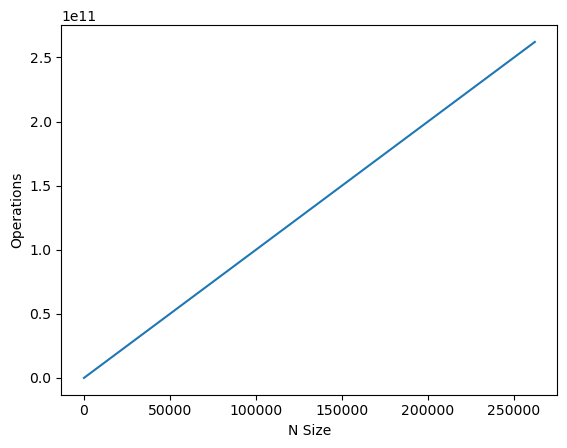

In [3]:
# The complexity is N as demonstrated below

fn fragment_1(N: Int64) -> Int64:
    var ct = 0
    for i in range(100):
        for j in range(N):
            for k in range(10_000):
                ct += 1
    return ct

plot_results(fragment_1)


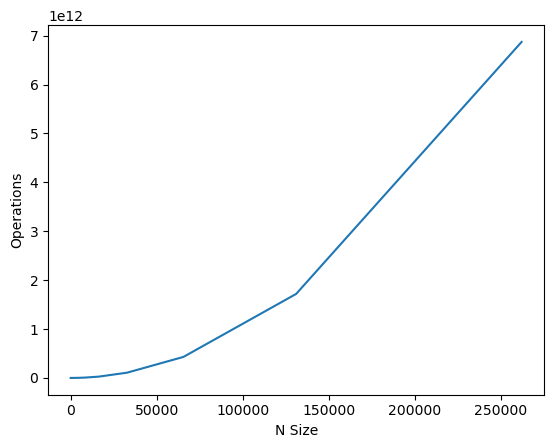

In [4]:
fn fragment_2(N: Int64) -> Int64:
    var ct: Int64 = 0
    for i in range(N):
        for j in range(N):
            for k in range(100):
                ct += 1
    return ct

# This has complexity O(N^2), polynomial complexity

plot_results(fragment_2)

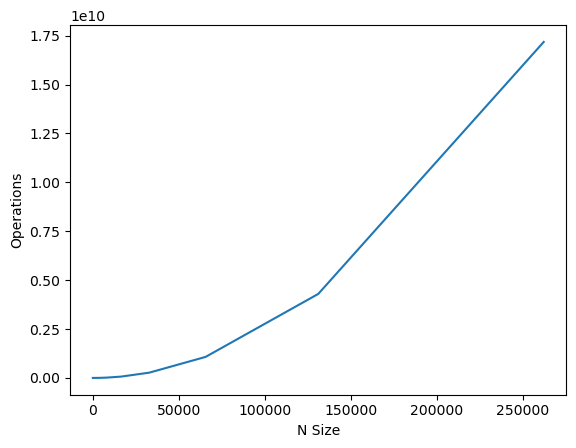

In [5]:
fn fragment_3(N: Int64) -> Int64:
    var ct: Int64 = 0
    for i in range(0, N, 2):
        for j in range(0, N, 2):
            ct += 1
    return ct

# This algorithm also has polynomial complexity O(N^2)
plot_results(fragment_3)

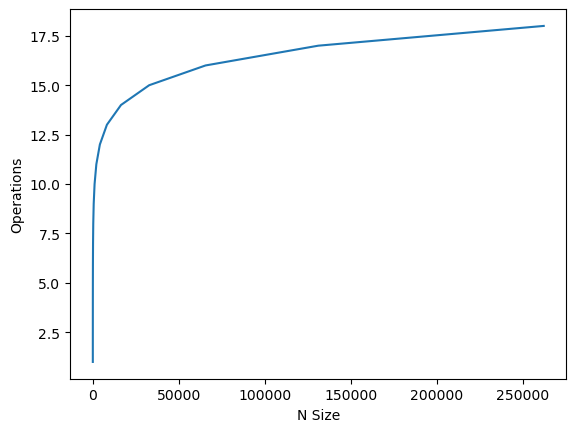

In [6]:
fn fragment_4(N: Int64) -> Int64:
    var ct: Int64 = 0
    var n = N
    
    while n > 1:
        ct += 1
        n = n // 2
    return ct

# This algorithm has complexity of O(log2(N))
plot_results(fragment_4)

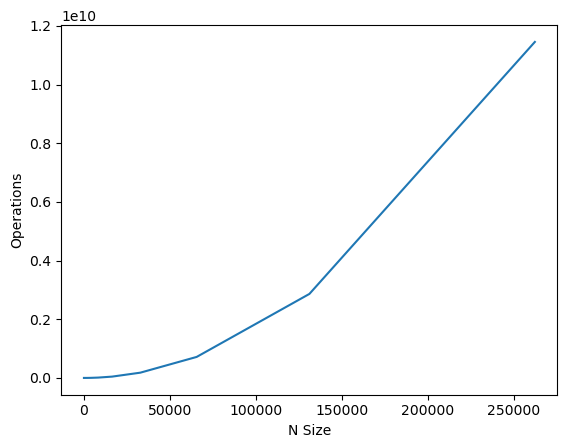

In [7]:
fn fragment_5(N: Int64) -> Int64:
    var ct: Int64 = 0
    for i in range(2, N, 3):
        for j in range(3, N, 2):
            ct += 1
    return ct

# This algorithm has a time complexity of O(N^2)
plot_results(fragment_5)

## Exercise 2:


Use the technique described in this chapter to model the value of ct returned by `f4` function in the following code:

```mojo
def f4(N):
    ct = 1
    while N >= 2:
        ct += 1
        N **= 0.5
    return ct
```

You will find that none of the models used in this chapter is accurate. Instead, develop one based ona `x log(log(N))`, in base 2. Generate a table up to $\text{N} = 2^{50}$  containing actual results as compared to the model. An algorithm with this behavior would be classified as `O(log(log(N)))`.

In [8]:
var pymath = Python.import_module("math")

In [9]:
fn f4(N: Int) -> Int64:
    var ct = 1
    var n: Float64 = N
    while n >= 2:
        ct += 1
        n = n ** 0.5
    return ct

In [10]:
var n = PythonObject([])
var results = PythonObject([])
var i = 2

while i <= 1048576:
    var res = f4(i)
    n.append(i)
    results.append(res)
    i *= 2

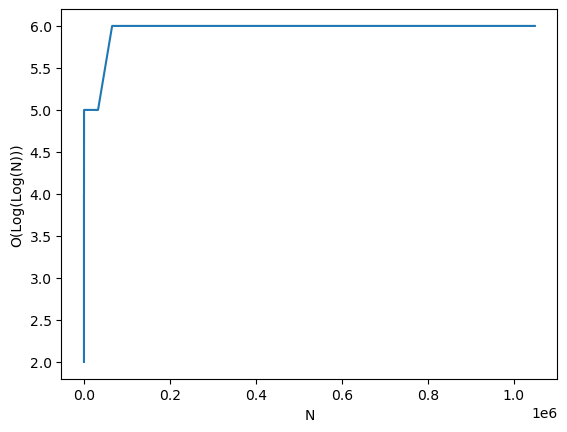

In [11]:
var plt = Python.import_module("matplotlib.pyplot")
plt.plot(n, results)
plt.xlabel("N")
plt.ylabel("O(Log(Log(N)))")
plt.show()

## Exercise 3:

One way to sort a list of values is to generate each permutation until you find one that is sorted as shown below:

```python
from itertools import permutations
from scipy.special import factorial

def factorial_model(n, a):
    return a * factorial(n)

def check_sorted(a):
    for i, val in enumerate(a):
        if i > 0 and val < a[i - 1]:
            return False
    return True

def permutation_sort(a):
    for attempt in permutations(a):
        if check_sorted(attempt):
            a[:] = attempt[:]
            return
```
Generate a table of results for sorting a worst case problem instance (i.e., the values are in descending order) of up to 12 elements using `permutation_sort`. Use the `factorial_model` to curve fit the preliminary results and see how accurate the model is in predictin runtime performance. Based on these results, what is your estimate (in years) for the runtime performance on a worst case problem instance of size 20?

In [12]:
fn factorial_model(A: PythonObject) raises -> PythonObject:
    var scipy = Python.import_module("scipy")
    var n = len(A)
    return scipy.special.factorial(n, exact=True) 

fn check_sorted(A: PythonObject) raises -> Bool:
    for i in range(len(A)):
        var val = A[i]
        if i > 0 and val < A[i - 1]:
            return False
    return True

fn permutation_sort(inout A: PythonObject) raises -> Float64:
    var start = now()
    var iters = Python.import_module("itertools")
    for attempt in iters.permutations(A):
        if check_sorted(attempt):
            A = attempt
    var end = now()
    var total_time = (end - start) / 1e9
    return total_time

In [13]:
def generate_numbers(inout A: PythonObject, n_values: Int):
    for i in range(n_values):
        var n = n_values - i
        A.append(n)

In [14]:
var results = Python.list()
for i in range(11):
    var A = Python.list()
    generate_numbers(A, i + 1)
    results.append(permutation_sort(A))

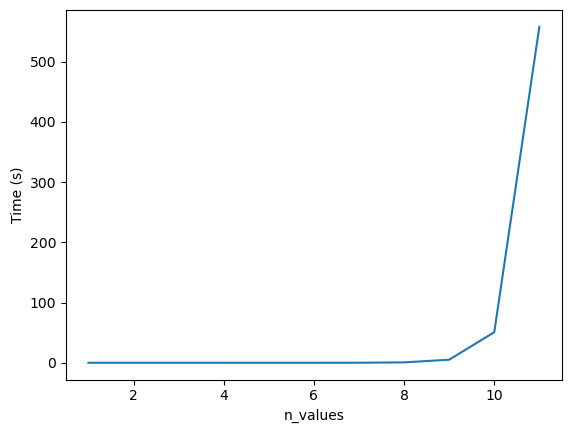

In [15]:
var n_values = PythonObject([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
plt.plot(n_values, results)
plt.xlabel("n_values")
plt.ylabel("Time (s)")
plt.show()

## Exercise 4:

Generate empirical evidence on 50,000 random trials of Binary Array Search (BAS) for N in the range of $2^5$ through $2^{21}$. Each trial should use `random.sample()` to randomly select N values from the range 0 ... 4N and place this values in sorted order. Then each trial should search for a random target value in the same range. 

Using the results I have outlined in this chapter, use `curve_fit()` to develop $\log(N)$ model that models the results of runtime performance for N in the range of $2^5$ through $2^{21}$. Determine the threshold problem instance size above which the behaviour stabilizeds. Create a visual plot of the data to see whether the computed model accurately models the empirical data. 

In [14]:
fn binary_array_search[
    type: DType
](array: nm.NDArray[type], target: Scalar[type]) raises -> Bool:
    var low = 0
    var high = len(array) - 1
    var mid: Int
    var diff: Scalar[type]
    var mid_value: Scalar[type]

    while low <= high:
        mid = (low + high) // 2
        mid_value = array.data[mid]
        diff = target - mid_value

        if diff < 0:
            high = mid - 1
        elif diff > 0:
            low = mid + 1
        else:
            return True

    return False


In [103]:
var n_trials = 10_000
var min_n = 2**5
var max_n = 2**15
var n_samples = List[Int64]()
var results = List[Float64]()

var trials = nm.NDArray[nm.i64](n_trials, min=min_n, max=max_n).sort()
for i in range(trials.shape()[0]):
    var start = now()
    
    var max_values = trials.data[i] * 4
    var random_element = random_si64(0, max_values)
    var array_elements = nm.NDArray[nm.i64](i, min=0, max=max_values).sort()
    var exists = binary_array_search(array_elements, random_element)

    var end = now()
    var time = (end - start) / 1e9

    if time < 0.01:
        n_samples.append(trials.data[i])
        results.append(time)




In [104]:
var test = nm.NDArray(
    data=n_samples, shape=List[Int](len(n_samples))
).to_numpy()
var logs = np.log(test)
print(test)


[   40    42    44 ... 32764 32766 32768]


In [105]:
var array_samples = nm.NDArray(
    n_samples, shape=List[Int](len(n_samples))
).to_numpy()
var array_results = nm.NDArray(
    results, shape=List[Int](len(results))
).to_numpy()
var a = array_results / np.log(array_samples)
var mean_a = np.mean(a)
var theoretical_a = mean_a * np.log(array_samples)


In [106]:
print(np.mean(array_results))

0.000355049104910491


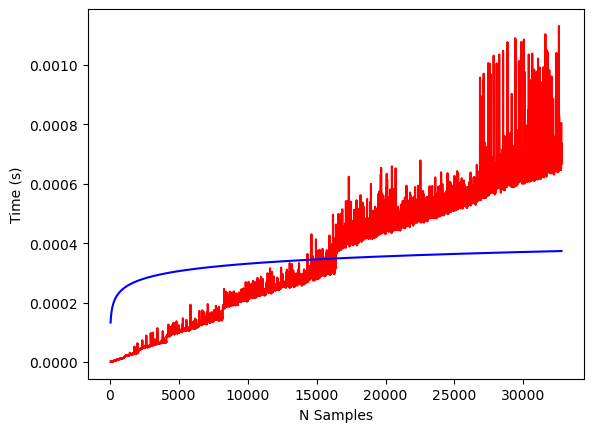

In [107]:
var plt = Python.import_module("matplotlib.pyplot")

plt.plot(array_samples, array_results, color="red")
plt.plot(array_samples, theoretical_a, color="blue")
plt.xlabel("N Samples") 
plt.ylabel("Time (s)")
plt.show()

## Exercise 5:

We are normally concerned with time complexity, but consider the sorting algorithm below:

```mojo
def max_sort(A):
    result = []
    while len(A) > 1:
        index_max = max(range(len(A)), key=A.__getitem__)
        result.insert(0, A[index_max])
         A = list(A[:index_max]) + list(A[index_max + 1:])
    return A + result
```

Using the results I have outlined in this chapter, assess the storage complexity of `max_sort`.


[10, 22, 15]


In [ ]:
array_a.